In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def displayim(img):
    plt.figure(figsize=(12,10))
    plt.imshow(img,"gray")

In [6]:
reeses = cv2.imread("../DATA/reeses_puffs.png",0)

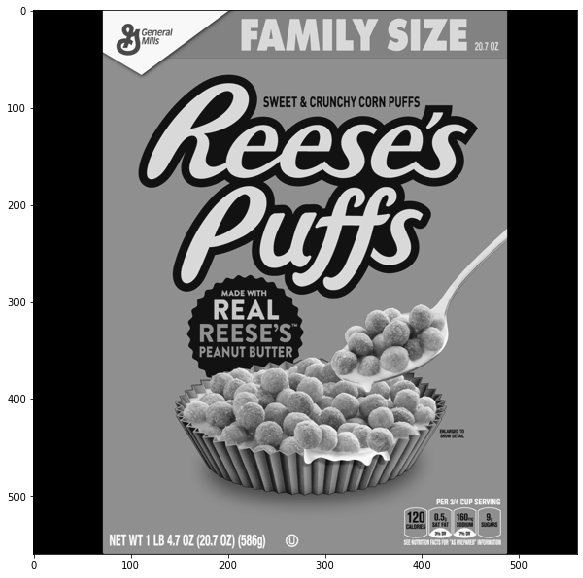

In [7]:
displayim(reeses)

In [8]:
cereals = cv2.imread("../DATA/many_cereals.jpg",0)

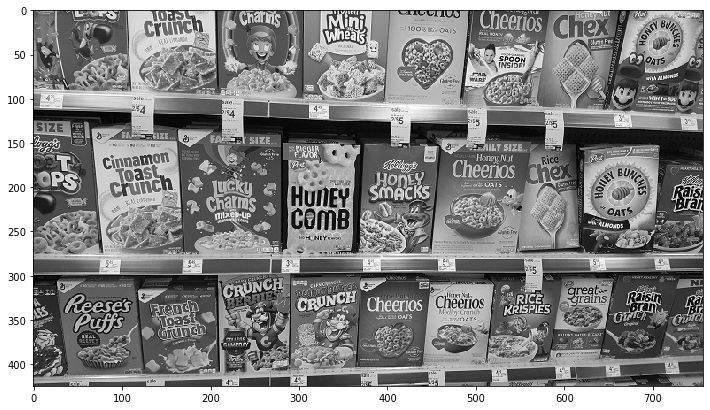

In [9]:
displayim(cereals)

In [10]:
orb = cv2.ORB_create()

In [11]:
key1,des1 = orb.detectAndCompute(reeses,None)

In [12]:
key2,des2 = orb.detectAndCompute(cereals,None)

In [14]:
key1[:10]

[<KeyPoint 000001DDD7EAFC00>,
 <KeyPoint 000001DDD7EAFE40>,
 <KeyPoint 000001DDD7EAFF30>,
 <KeyPoint 000001DDD7C01900>,
 <KeyPoint 000001DDD7C01A80>,
 <KeyPoint 000001DDD7C01750>,
 <KeyPoint 000001DDD7C016F0>,
 <KeyPoint 000001DDD7C01510>,
 <KeyPoint 000001DDD7C01A20>,
 <KeyPoint 000001DDD7C016C0>]

In [16]:
onekey  = key1[0]

In [17]:
onekey.size

31.0

In [18]:
onekey.angle

98.16710662841797

In [19]:
onekey.octave

0

In [20]:
onekey.pt

(365.0, 211.0)

In [21]:
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,True)

In [22]:
matches = bf.match(des1,des2)

In [30]:
matches[:10]

[<DMatch 000001DDD7E42BF0>,
 <DMatch 000001DDD7E42890>,
 <DMatch 000001DDD7E42C30>,
 <DMatch 000001DDD7E42C70>,
 <DMatch 000001DDD7E42650>,
 <DMatch 000001DDD7DA6530>,
 <DMatch 000001DDD7DA63F0>,
 <DMatch 000001DDD7E426D0>,
 <DMatch 000001DDD7DA68B0>,
 <DMatch 000001DDD7E42930>]

In [31]:
len(matches)

263

In [26]:
onematch = matches[0]

In [27]:
onematch.distance

78.0

In [29]:
matches = sorted(matches,key=lambda x:x.distance)

In [34]:
finalim = cv2.drawMatches(reeses,key1,cereals,key2,matches[:70],None,flags=2,matchColor=(0,255,0))

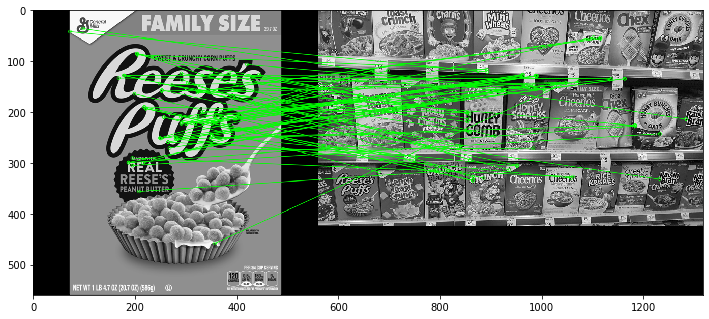

In [35]:
displayim(finalim)

In [36]:
sift = cv2.xfeatures2d.SIFT_create()

In [38]:
key1,des1 = sift.detectAndCompute(reeses,None)

In [39]:
key2,des2 = sift.detectAndCompute(cereals,None)

In [40]:
bf = cv2.BFMatcher_create()

In [82]:
matches = bf.knnMatch(des1,des2,k=2)

In [84]:
len(key1)

1500

In [85]:
len(key2)

3744

In [44]:
des1[:2]

array([[ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   2., 159.,   0.,   0.,
          0.,   0.,   0.,   0.,  46., 158.,   0.,   0.,   1.,   1.,   0.,
          0.,  22.,   1.,   0.,   4.,  50.,  17.,   0.,   0.,   0.,  32.,
          0.,   0.,   0.,   0.,   0.,   0.,   3., 159.,  13.,   0.,   0.,
          0.,   0.,   0.,  44., 155.,  14.,   0.,   1.,   7.,   0.,   0.,
         15.,   1.,   0.,   1.,  46., 132.,  17.,   0.,   0.,  35.,   1.,
          0.,   0.,   0.,   0.,   0.,   2., 159.,  97.,   1.,   0.,   0.,
          0.,   0.,  11.,  73., 159.,  23.,   0.,   3.,   1.,   0.,   1.,
          0.,  34.,  10.,   1.,  61.,  76.,   2.,   0.,  32.,   0.,   0.,
          0.,   0.,   0.,   0.,   5., 159.,  13.,   0.,   0.,   0.,   0.,
          0.,  34.,  28., 101.,  20.,   0.,   0.,   3.,   2.,   7.,   0.,
        124.,  30.,   0.,   1.,  11.,   1.,   0.],
       [ 21.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 169.,   0.,   0.,
          0.,   0.,   0.,   0.,  55., 149.,   2.,  14.,  49.,

In [46]:
matches[:10]

[[<DMatch 000001DDD7823370>, <DMatch 000001DDD7A872D0>],
 [<DMatch 000001DDD7A87250>, <DMatch 000001DDD7A879F0>],
 [<DMatch 000001DDD7A87810>, <DMatch 000001DDD7A87570>],
 [<DMatch 000001DDD7A87410>, <DMatch 000001DDD7A87710>],
 [<DMatch 000001DDD7A873D0>, <DMatch 000001DDD7A87370>],
 [<DMatch 000001DDD7A87350>, <DMatch 000001DDD7A87270>],
 [<DMatch 000001DDD7A871F0>, <DMatch 000001DDD7A874D0>],
 [<DMatch 000001DDD7A87130>, <DMatch 000001DDD7A870F0>],
 [<DMatch 000001DDD7A870B0>, <DMatch 000001DDD7A87070>],
 [<DMatch 000001DDD7A87030>, <DMatch 000001DDD7A87050>]]

In [50]:
len(matches)

1500

In [52]:
good = []

In [53]:
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [80]:
finalim = cv2.drawMatchesKnn(reeses,key1,cereals,key2,good,None,matchColor=(0,255,0),singlePointColor=(199,21,133),flags=0)

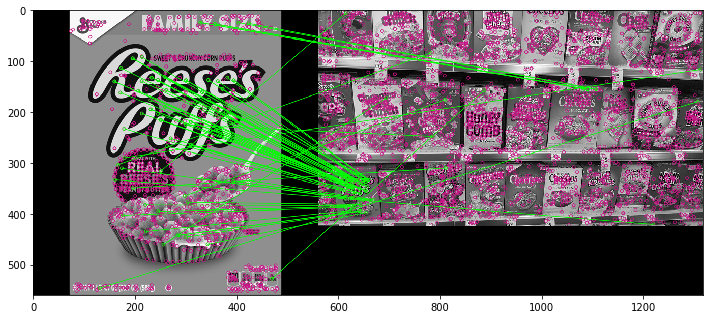

In [81]:
displayim(finalim)

In [86]:
sift = cv2.xfeatures2d.SIFT_create()

In [87]:
key1, des1 = sift.detectAndCompute(reeses,None)

In [88]:
key2, des2 = sift.detectAndCompute(cereals,None)

In [98]:
flann = cv2.FlannBasedMatcher(dict(algorithm=0,trees=5),dict(checks=50))

In [99]:
matches = flann.knnMatch(des1,des2,k=2)

In [100]:
matchMask = [[0,0] for i in range(len(matches))]

In [101]:
for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchMask[i] = [1,0]

In [102]:
finalim = cv2.drawMatchesKnn(reeses,key1,cereals,key2,matches,None,(255,215,0),(255,99,71),matchMask,0)

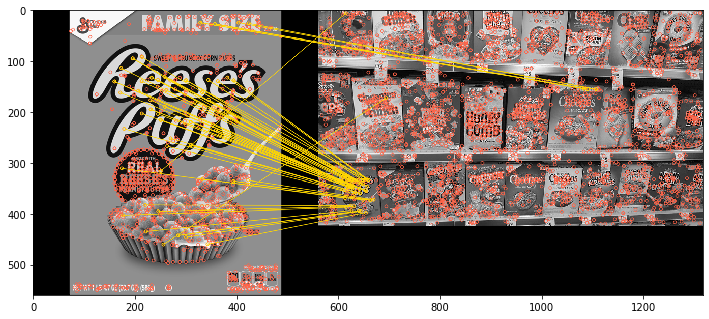

In [103]:
displayim(finalim)